   # Machine Learning

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import matplotlib as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [3]:
df = pd.read_csv("../data/dataframe.csv")
df2 = pd.read_csv("../data/dataframe2.csv")

df

,summonerName,tier,division,leaguePoints,wins,losses,veteran,freshBlood,hotStreak,summonerLevel,...,totalMinionsKilled,totalTimeSpentDead,visionScore,gameStartTimestamp,championName,firstBloodAssist,firstBloodKill,inhibitorTakedowns,win,timePlayed
0,gyojaldo,DIAMOND,I,17,235,215,False,False,False,196,...,1.205013,5.756193,0.788067,2,LeeSin,0.000000,0.166667,0.166667,0.333333,30.533333
1,ya ne ispravlus,DIAMOND,I,11,458,426,False,False,False,148,...,0.926244,7.768786,0.728324,12,RekSai,0.090909,0.272727,1.272727,0.636364,29.516667
2,EC4 Murkel,DIAMOND,I,36,300,288,False,False,False,584,...,7.662008,1.139008,0.673167,16,Malphite,0.500000,0.000000,0.500000,1.000000,18.950000
3,xXxavierlebgXx,DIAMOND,I,100,66,54,False,False,False,62,...,0.548154,3.135827,2.415867,17,Lulu,0.166667,0.000000,1.000000,0.833333,28.186111
4,Kakashi Kamui,DIAMOND,I,58,105,79,False,False,True,547,...,6.172784,5.683387,0.370848,13,Yasuo,0.000000,0.000000,1.000000,1.000000,24.508333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22181,ZzonleK,GOLD,II,1,427,403,False,False,True,294,...,1.133876,6.865360,0.718524,22,Kayn,0.166667,0.000000,0.666667,0.833333,30.819444
22182,Jùñglê,GOLD,II,46,24,17,False,False,False,37,...,1.228262,5.724598,0.717520,23,Khazix,0.000000,0.000000,0.500000,0.750000,32.329167
22183,Reformed Swe999,GOLD,II,72,66,32,False,False,True,50,...,6.293448,10.422806,0.438648,18,Kayle,0.000000,0.166667,0.333333,0.666667,30.208333
22184,nyjcia9,GOLD,II,39,68,77,False,False,False,134,...,5.160075,6.930320,0.198151,15,Syndra,0.000000,0.333333,0.000000,0.000000,26.422222


In [25]:
df.shape

(22186, 31)

In [26]:
df2.shape

(25963, 31)

In [4]:
df.fillna(0,inplace=True)
df2.fillna(0,inplace=True)


In [121]:
df.columns

Index(['summonerName', 'tier', 'division', 'leaguePoints', 'wins', 'losses',
       'veteran', 'freshBlood', 'hotStreak', 'summonerLevel', 'assists',
       'champExperience', 'damageDealtToBuildings', 'damageDealtToObjectives',
       'damageSelfMitigated', 'deaths', 'goldEarned', 'kills',
       'timeCCingOthers', 'totalDamageDealt', 'totalDamageDealtToChampions',
       'totalMinionsKilled', 'totalTimeSpentDead', 'visionScore',
       'gameStartTimestamp', 'championName', 'firstBloodAssist',
       'firstBloodKill', 'inhibitorTakedowns', 'win', 'timePlayed'],
      dtype='object')

<AxesSubplot:xlabel='gameStartTimestamp', ylabel='count'>

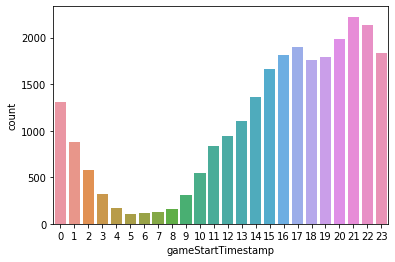

In [28]:
sns.countplot(x=df2["gameStartTimestamp"],order=None)

In [29]:
df2.tier.value_counts()

DIAMOND        4064
GOLD           4010
PLATINUM       4007
SILVER         4006
BRONZE         3953
IRON           3914
MASTER         1017
GRANDMASTER     693
CHALLENGER      299
Name: tier, dtype: int64

In [30]:
df2.championName.value_counts()

Yasuo          638
Lux            473
Ezreal         438
Jhin           433
Zed            433
              ... 
Azir            33
Lissandra       32
Elise           26
AurelionSol     25
Skarner         18
Name: championName, Length: 157, dtype: int64

In [122]:
df2["role"].value_counts()

SOLO       10928
SUPPORT     5417
NONE        5017
CARRY       4357
DUO          244
Name: role, dtype: int64

In [5]:
df["rank"] = df.tier + df.division
df2["rank"] = df2.tier + df2.division

In [15]:
print(len(df["rank"].unique())," ranks")
df["rank"].unique()

27  ranks


array(['DIAMONDI', 'DIAMONDII', 'DIAMONDIII', 'DIAMONDIV', 'PLATINUMI',
       'PLATINUMII', 'PLATINUMIII', 'SILVERI', 'SILVERII', 'SILVERIII',
       'SILVERIV', 'BRONZEI', 'BRONZEII', 'BRONZEIII', 'BRONZEIV',
       'IRONI', 'IRONII', 'IRONIII', 'GOLDII', 'GOLDIII', 'GOLDIV',
       'IRONIV', 'CHALLENGERI', 'GRANDMASTERI', 'MASTERI', 'PLATINUMIV',
       'GOLDI'], dtype=object)

In [6]:
num_rank = {'DIAMONDI':24, 'DIAMONDII':23, 'DIAMONDIII':22, 'DIAMONDIV':21, 'PLATINUMI':20,
       'PLATINUMII':19, 'PLATINUMIII':18, 'SILVERI':12, 'SILVERII':11, 'SILVERIII':10,
       'SILVERIV':9, 'BRONZEI':8, 'BRONZEII':7, 'BRONZEIII':6, 'BRONZEIV':5,
       'IRONI':4, 'IRONII':3, 'IRONIII':2, 'GOLDII':15, 'GOLDIII':14, 'GOLDIV':13,
       'IRONIV':1, 'CHALLENGERI':27, 'GRANDMASTERI':26, 'MASTERI':25, 'PLATINUMIV':17,
       'GOLDI':16}

In [23]:
d= {v:k for k,v in num_rank.items()}
d

{24: 'DIAMONDI',
 23: 'DIAMONDII',
 22: 'DIAMONDIII',
 21: 'DIAMONDIV',
 20: 'PLATINUMI',
 19: 'PLATINUMII',
 18: 'PLATINUMIII',
 12: 'SILVERI',
 11: 'SILVERII',
 10: 'SILVERIII',
 9: 'SILVERIV',
 8: 'BRONZEI',
 7: 'BRONZEII',
 6: 'BRONZEIII',
 5: 'BRONZEIV',
 4: 'IRONI',
 3: 'IRONII',
 2: 'IRONIII',
 15: 'GOLDII',
 14: 'GOLDIII',
 13: 'GOLDIV',
 1: 'IRONIV',
 27: 'CHALLENGERI',
 26: 'GRANDMASTERI',
 25: 'MASTERI',
 17: 'PLATINUMIV',
 16: 'GOLDI'}

In [20]:
d[4]

'IRONI'

In [7]:
df["rank"] = df["rank"].replace(num_rank)
df2["rank"] = df2["rank"].replace(num_rank)

df["rank"].unique()

array([24, 23, 22, 21, 20, 19, 18, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2, 15, 14, 13,  1, 27, 26, 25, 17, 16])

<AxesSubplot:xlabel='rank', ylabel='count'>

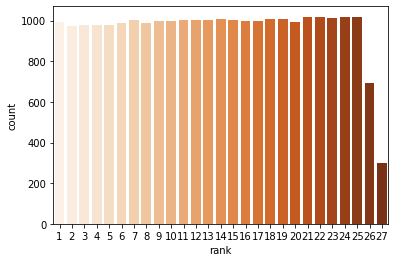

In [36]:
sns.countplot(x=df2["rank"], palette="Oranges")

In [8]:
df["win_r"]= df.wins/(df.wins + df.losses)
df2["win_r"]= df2.wins/(df2.wins + df2.losses)

In [67]:
df.corr()["rank"].sort_values()

timePlayed                    -0.228871
totalTimeSpentDead            -0.187669
deaths                        -0.156640
timeCCingOthers               -0.003926
gameStartTimestamp             0.010535
firstBloodKill                 0.051640
damageSelfMitigated            0.057332
firstBloodAssist               0.091566
hotStreak                      0.100320
damageDealtToBuildings         0.137086
win                            0.143568
kills                          0.150199
inhibitorTakedowns             0.161154
damageDealtToObjectives        0.166800
assists                        0.181694
totalDamageDealtToChampions    0.217204
freshBlood                     0.218953
veteran                        0.239159
totalMinionsKilled             0.240303
totalDamageDealt               0.247846
champExperience                0.301213
visionScore                    0.307949
summonerLevel                  0.313340
goldEarned                     0.366195
leaguePoints                   0.431955


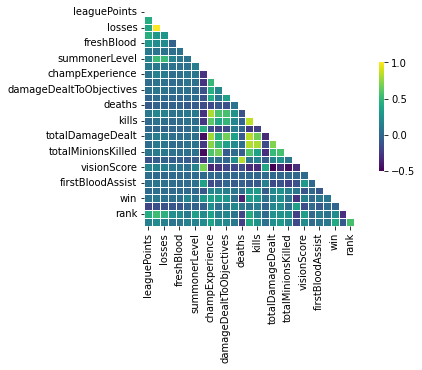

In [10]:
mask = np.triu(np.ones_like(df2.corr(), dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True) 


sns.heatmap(df2.corr(), 
            mask=mask,
            cmap="viridis",
            vmax=1,
            square=True, 
            linewidth=.5, 
            cbar_kws={"shrink": .5} 

);

In [12]:
df2 = pd.get_dummies(df2, columns=["role"], drop_first=False)
df2.shape

(25963, 37)

In [13]:
dfm = df.drop(["summonerName","tier","division","championName"],axis=1)
df2m = df2.drop(["summonerName","tier","division","championName"],axis=1)

## Model

In [14]:
X = dfm.drop("rank", axis=1)
y = dfm["rank"]

X2 = df2m.drop("rank", axis=1)
y2 = df2m["rank"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=141)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=141)


In [17]:
X2_train.columns

Index(['leaguePoints', 'wins', 'losses', 'veteran', 'freshBlood', 'hotStreak',
       'summonerLevel', 'assists', 'champExperience', 'damageDealtToBuildings',
       'damageDealtToObjectives', 'damageSelfMitigated', 'deaths',
       'goldEarned', 'kills', 'timeCCingOthers', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalMinionsKilled',
       'totalTimeSpentDead', 'visionScore', 'gameStartTimestamp',
       'firstBloodAssist', 'firstBloodKill', 'win', 'timePlayed', 'win_r',
       'role_CARRY', 'role_DUO', 'role_NONE', 'role_SOLO', 'role_SUPPORT'],
      dtype='object')

In [42]:
lin = LinearRegression()
lin.fit(
    X=X_train, 
    y=y_train
)

LinearRegression()

In [43]:
lin2 = LinearRegression()
lin2.fit(
    X=X2_train, 
    y=y2_train
)

LinearRegression()

In [44]:
lin.predict(X_test[:5]).round(1)

array([25.8,  7.7,  8.5,  6.2, 17.7])

In [45]:
y_test[:5]


18200    26
11772     4
9438      8
12444     3
1715     23
Name: rank, dtype: int64

In [46]:
lin2.predict(X2_test[:5]).round(1)

array([17.3, 12.7, 19.8, 14. ,  3. ])

In [47]:
y2_test[:5]


5314     19
8076     10
5188     19
4826     20
11851     6
Name: rank, dtype: int64

In [81]:
print("train error ",mean_squared_error(y_train, lin.predict(X_train)).round(3))
print("test error ",mean_squared_error(y_test, lin.predict(X_test)).round(3))

train error  15.811
test error  15.029


In [48]:
print("train2 error ",mean_squared_error(y2_train, lin2.predict(X2_train)).round(3))
print("test2 error ",mean_squared_error(y2_test, lin2.predict(X2_test)).round(3))

train2 error  14.247
test2 error  13.93


In [49]:
model = DecisionTreeRegressor(max_depth=1, random_state=141)
model.fit(X_train, y_train)

model2 = DecisionTreeRegressor(max_depth=1, random_state=141)
model2.fit(X2_train, y2_train)


DecisionTreeRegressor(max_depth=1, random_state=141)

In [85]:
model.predict(X_train[:5].values).round(2)

array([17.57, 17.57,  7.47,  7.47, 17.57])

In [86]:
y_train[:5]

4686     20
3906     21
13481     2
11440     5
16083    12
Name: rank, dtype: int64

In [50]:
model2.predict(X2_train[:5].values).round(2)

array([ 7.17,  7.17, 17.07, 17.07,  7.17])

In [51]:
y2_train[:5]

12139     6
15001     3
12330     6
21803    25
20034     1
Name: rank, dtype: int64

In [55]:
print("train error ",mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
).round(3))
print("test error ",mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
).round(3))
print()
print("train2 error ",mean_squared_error(
    y_true=y2_train,
    y_pred=model2.predict(X2_train)
).round(3))
print("test2 error ",mean_squared_error(
    y_true=y2_test,
    y_pred=model2.predict(X2_test)
).round(3))

train error  34.015
test error  32.941

train2 error  34.096
test2 error  34.099


### depth tree 

In [91]:
results = []

for depth in range(1, 21):
    model = DecisionTreeRegressor(max_depth=depth, random_state=666)
    model.fit(X_train, y_train)
    
    result = {
        "model": model,
        "depth": depth,
        "train_error": mean_squared_error(y_train, model.predict(X_train)),
        "test_error": mean_squared_error(y_test, model.predict(X_test))
    }
    
    results.append(result)

In [56]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

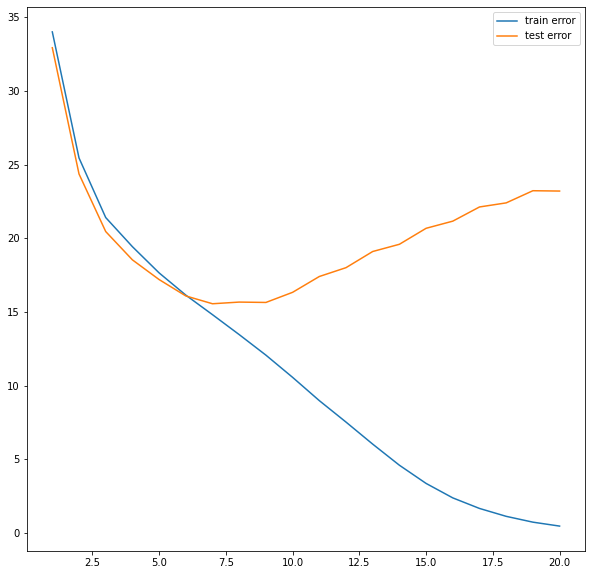

In [94]:
results_df = pd.DataFrame(results)

fig = plt.figure(figsize=(10, 10))
plt.plot(results_df.depth, results_df.train_error, label="train error")
plt.plot(results_df.depth, results_df.test_error, label="test error")
plt.legend()

In [95]:
model = DecisionTreeRegressor(max_depth=7, min_samples_split=30, random_state=141)
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=7, min_samples_split=30, random_state=141)

In [62]:

print(f"RMSE train: {mean_squared_error(y_train, model.predict(X_train)) ** 0.5}")
print(f"RMSE test: {mean_squared_error(y_test, model.predict(X_test)) ** 0.5}")

ValueError: X has 28 features, but DecisionTreeRegressor is expecting 32 features as input.

In [59]:
results = []

for depth in range(1, 21):
    model2 = DecisionTreeRegressor(max_depth=depth, random_state=666)
    model2.fit(X2_train, y2_train)
    
    result = {
        "model": model2,
        "depth": depth,
        "train_error": mean_squared_error(y2_train, model2.predict(X2_train)),
        "test_error": mean_squared_error(y2_test, model2.predict(X2_test))
    }
    
    results.append(result)

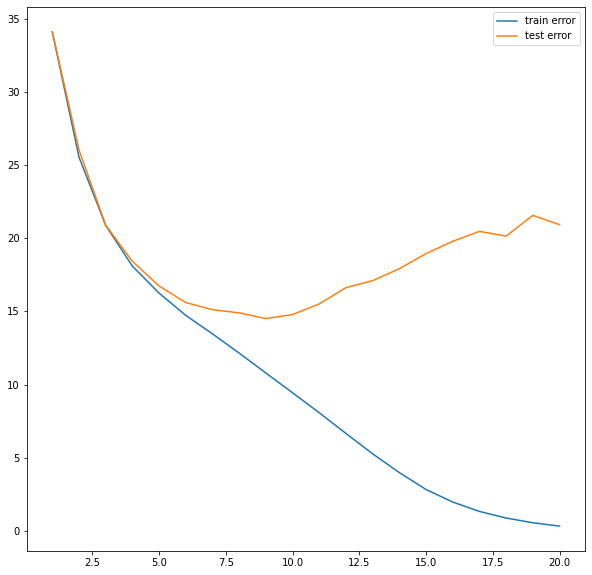

In [60]:
results_df = pd.DataFrame(results)

fig = plt.figure(figsize=(10, 10))
plt.plot(results_df.depth, results_df.train_error, label="train error")
plt.plot(results_df.depth, results_df.test_error, label="test error")
plt.legend()

In [61]:
model = DecisionTreeRegressor(max_depth=9, min_samples_split=30, random_state=141)
model.fit(X2_train, y2_train)

DecisionTreeRegressor(max_depth=9, min_samples_split=30, random_state=141)

In [63]:
print(f"RMSE train: {mean_squared_error(y2_train, model.predict(X2_train)) ** 0.5}")
print(f"RMSE test: {mean_squared_error(y2_test, model.predict(X2_test)) ** 0.5}")

RMSE train: 3.336760624413626
RMSE test: 3.768274590563752


In [64]:
model.fit(X2, y2)

DecisionTreeRegressor(max_depth=9, min_samples_split=30, random_state=141)

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

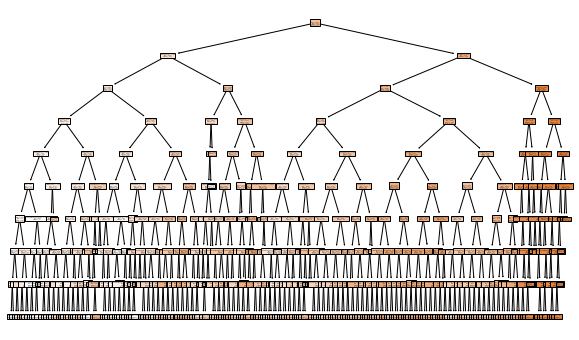

In [69]:
fig = plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=X2.columns[:-1], filled=True);

In [70]:
fig.savefig("classif_rank.svg")


In [73]:
import sys
import pickle
sys.path.append('../')

In [75]:
#pickle.dump(model, open("./decisiontree1.pkl", "wb"))
with open("../data/decisiontree1.pkl", "wb") as mod:
    pickle.dump(model,mod)

In [ ]:
# test phase
pickle.load()
user_series.to_frame()